# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset= pd.read_csv('Mall_Customers.csv')
X= dataset.iloc[:,3:].values #selected only 2 features so it can be visualized for learning 
                             #should use all features for actual algo.

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Using the elbow method to find the optimal number of clusters

Text(0, 0.5, 'WCSS')

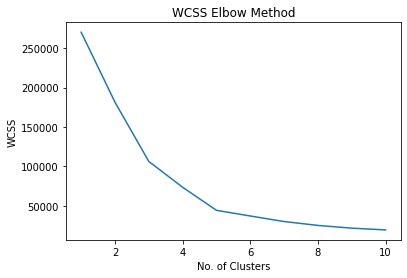

In [4]:
from sklearn.cluster import KMeans

wcss= []
for n in range(1,11):
    kmeans= KMeans(n_clusters= n, init= 'k-means++', random_state= 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # .inertia_ is an attribute of KMeans and returns the 
                    #Sum of squared distances of samples to their closest cluster center i.e WCSS.

plt.plot(range(1,11),wcss)
plt.title('WCSS Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')

## Training the K-Means model on the dataset

In [5]:
kmeans= KMeans(n_clusters= 5, init= 'k-means++', random_state= 42)

### Prediction

In [6]:
y_kmeans= kmeans.fit_predict(X)

In [7]:
y_kmeans #all the points in X assigned to the 5 clusters

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [8]:
kmeans.cluster_centers_ #attribute to get cluster centroids

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

### Visualising Clusters 

Text(0, 0.5, 'Spending Score')

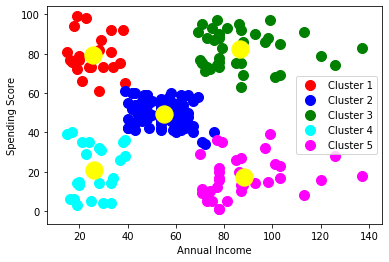

In [9]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1], s=100,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1], s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1], s=100,c='green',label='Cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1], s=100,c='cyan',label='Cluster 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1], s=100,c='magenta',label='Cluster 5')
plt.legend()
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroid')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')